In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [160]:
train_raw = pd.read_csv('Train.csv')
train_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,06-05-2011 16:54,3.75,14056,35
1,6349,1300,3682,6,11-05-2011 07:35,1.95,13098,35
2,16783,2178,1939,4,20-11-2011 13:20,5.95,15044,35
3,16971,2115,2983,1,22-11-2011 12:07,0.83,15525,35
4,6080,1210,2886,12,06-05-2011 09:00,1.65,13952,35


In [161]:
train_raw[train_raw.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
10046,17505,2388,3587,1,28-11-2011 14:30,2.08,13030,35
10509,15113,2175,100,5,01-11-2011 10:16,0.83,17377,35
10652,3421,2546,216,3,01-03-2011 13:51,0.21,15456,35
11965,11965,3108,195,6,11-09-2011 14:51,1.25,13611,35
13108,14321,2091,3029,1,19-10-2011 13:58,1.25,14704,35
...,...,...,...,...,...,...,...,...
284469,18025,2385,3308,1,04-12-2011 13:32,1.95,17936,35
284548,17342,1411,2583,1,25-11-2011 13:40,1.65,12748,35
284577,13222,1919,2721,2,03-10-2011 11:34,8.25,17321,35
284723,385,285,67,2,05-12-2010 15:12,1.25,15889,35


In [162]:
train_raw.drop_duplicates(keep = 'first', inplace = True)

In [163]:
train_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,06-05-2011 16:54,3.75,14056,35
1,6349,1300,3682,6,11-05-2011 07:35,1.95,13098,35
2,16783,2178,1939,4,20-11-2011 13:20,5.95,15044,35
3,16971,2115,2983,1,22-11-2011 12:07,0.83,15525,35
4,6080,1210,2886,12,06-05-2011 09:00,1.65,13952,35


In [164]:
train_raw.drop(['InvoiceDate'],1,inplace = True)

In [165]:
train_raw.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,6141,1583,144,3,3.75,14056,35
1,6349,1300,3682,6,1.95,13098,35
2,16783,2178,1939,4,5.95,15044,35
3,16971,2115,2983,1,0.83,15525,35
4,6080,1210,2886,12,1.65,13952,35


In [166]:
train_raw.groupby(['InvoiceNo'])['UnitPrice'].sum()

InvoiceNo
0         23.98
1          1.85
2         51.64
3         19.10
4          5.95
          ...  
22184      2.08
22185      2.08
22186      2.78
22187    224.69
22188     10.95
Name: UnitPrice, Length: 20971, dtype: float64

In [167]:
#plt.figure(figsize=(12,12))
#sns.pairplot(train_raw)

<AxesSubplot:>

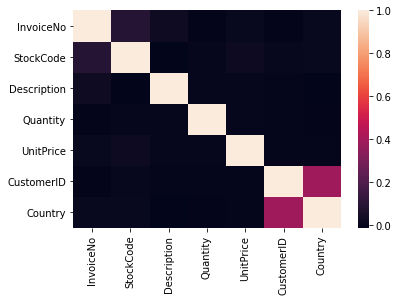

In [168]:
sns.heatmap(train_raw.corr())

In [169]:
train_raw.corr()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceNo,1.000000,0.086670,0.024444,-0.008362,0.007998,-0.007367,0.005277
StockCode,0.086670,1.000000,-0.013277,-0.000987,0.020139,0.003348,0.006333
Description,0.024444,-0.013277,1.000000,0.000193,-0.000416,-0.005036,-0.014644
Quantity,-0.008362,-0.000987,0.000193,1.000000,-0.000926,-0.002839,-0.007925
UnitPrice,0.007998,0.020139,-0.000416,-0.000926,1.000000,-0.004917,-0.005348
CustomerID,-0.007367,0.003348,-0.005036,-0.002839,-0.004917,1.000000,0.388989
Country,0.005277,0.006333,-0.014644,-0.007925,-0.005348,0.388989,1.000000


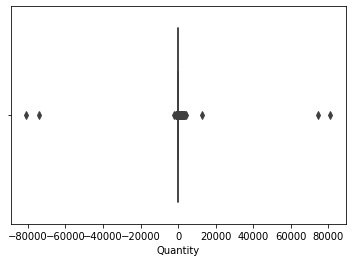

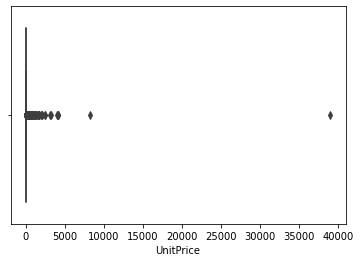

In [170]:
plt.show(sns.boxplot(train_raw['Quantity']))
plt.show(sns.boxplot(train_raw['UnitPrice']))

In [171]:
quantity_cutoff = train_raw['Quantity'].mean() + 3*train_raw['Quantity'].std()
quantity_cutoff

901.5013124259513

In [172]:
train_raw = train_raw[train_raw['Quantity'] < quantity_cutoff]
train_raw

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,6141,1583,144,3,3.75,14056,35
1,6349,1300,3682,6,1.95,13098,35
2,16783,2178,1939,4,5.95,15044,35
3,16971,2115,2983,1,0.83,15525,35
4,6080,1210,2886,12,1.65,13952,35
...,...,...,...,...,...,...,...
284775,3408,1706,1081,6,1.65,17965,35
284776,13982,2184,2947,16,0.65,16793,35
284777,6641,667,3632,4,8.50,14755,35
284778,13820,1576,3089,48,3.45,14866,35


In [173]:
unitprice_cutoff = train_raw['UnitPrice'].quantile(0.99)
unitprice_cutoff

15.0

In [174]:
train_raw = train_raw[train_raw['UnitPrice'] <= unitprice_cutoff]
train_raw

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,6141,1583,144,3,3.75,14056,35
1,6349,1300,3682,6,1.95,13098,35
2,16783,2178,1939,4,5.95,15044,35
3,16971,2115,2983,1,0.83,15525,35
4,6080,1210,2886,12,1.65,13952,35
...,...,...,...,...,...,...,...
284775,3408,1706,1081,6,1.65,17965,35
284776,13982,2184,2947,16,0.65,16793,35
284777,6641,667,3632,4,8.50,14755,35
284778,13820,1576,3089,48,3.45,14866,35


In [175]:
train_raw['UnitPrice'].quantile(0.99)

12.75

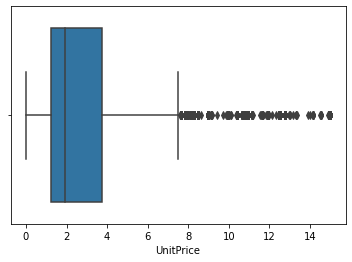

In [176]:
plt.show(sns.boxplot(train_raw['UnitPrice']))

In [177]:
train_raw.drop(list(train_raw[train_raw['Quantity']<0].index),inplace = True)

In [178]:
train_raw['Quantity'].describe()

count    273452.000000
mean         12.233372
std          30.564162
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max         900.000000
Name: Quantity, dtype: float64

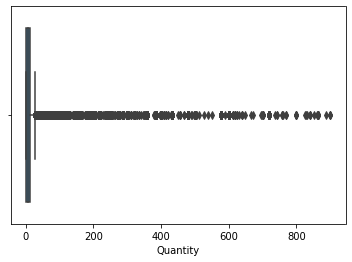

In [179]:
plt.show(sns.boxplot(train_raw['Quantity']))

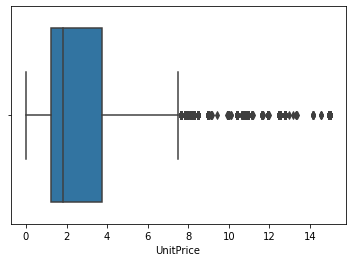

In [180]:
plt.show(sns.boxplot(train_raw['UnitPrice']))

In [181]:
train_raw.shape

(273452, 7)

In [182]:
train_raw.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,6141,1583,144,3,3.75,14056,35
1,6349,1300,3682,6,1.95,13098,35
2,16783,2178,1939,4,5.95,15044,35
3,16971,2115,2983,1,0.83,15525,35
4,6080,1210,2886,12,1.65,13952,35


In [183]:
target = train_raw['UnitPrice']
train_raw.drop(['UnitPrice'],1,inplace = True)

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_raw,target,test_size = 0.3, random_state = 42)

In [185]:
X_train.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country
190494,13383,2101,3019,12,12841,35
185725,18165,3193,2917,1,14096,35
101159,13027,1964,1620,4,12957,35
139122,13201,2101,3019,3,17841,35
282222,5473,979,102,12,15755,35


In [186]:
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

In [187]:
#n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 3)]
#max_features = ['auto', 'sqrt']
#max_depth = [int(x) for x  in np.linspace(start = 5, stop = 30, num= 3)]
#min_samples_split = [2,5,10]
#min_samples_leaf = [5,10]

In [156]:
rf_rand = RandomForestRegressor()
#from sklearn.model_selection import RandomizedSearchCV

In [157]:
#random_grid = {"n_estimators":n_estimators,
#              "max_features":max_features,
#              "max_depth":max_depth,
#               "min_samples_split":min_samples_split,
#              "min_samples_leaf":min_samples_leaf}
#print(random_grid)

{'n_estimators': [100, 650, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 17, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [5, 10]}


In [192]:
#rf_model = RandomizedSearchCV(estimator = rf_rand, param_distributions = random_grid, 
#                   scoring ='neg_mean_squared_error', n_iter = 5, cv = 5, verbose = 2,
#                  random_state = 42, n_jobs = 1)


In [190]:
rf_model = RandomForestRegressor(n_estimators= 500, max_features= 'auto', max_depth = 5, min_samples_split= 5, min_samples_leaf= 5 )

In [191]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=500)

In [193]:
predictions = rf_model.predict(X_test)
predictions

array([3.62623108, 0.93694586, 1.12581177, ..., 3.07637103, 1.470595  ,
       1.94123811])

<AxesSubplot:xlabel='UnitPrice', ylabel='Density'>

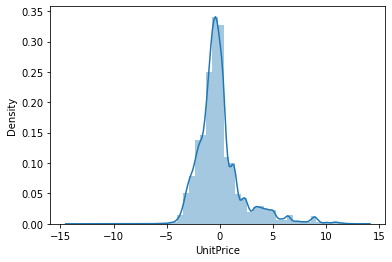

In [195]:
sns.distplot(y_test-predictions)

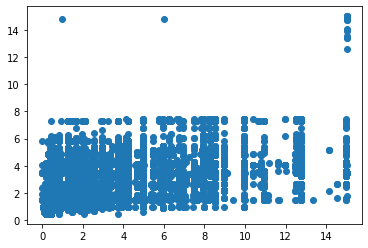

In [196]:
plt.scatter(y_test, predictions)

In [198]:
import pickle
file = open('best_regression_model.pkl', 'wb')
pickle.dump(rf_model, file)